# Normalization

**Import**

In [22]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import bbknn
import diffxpy.api as dxpy
import plotly.express as px

**Read anndata matrix**

In [23]:
path_out = f'/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/MAC/adata/'

adata_out_mm = f'{path_out}/preproc_1_starsolo_multimap_mac.h5ad'

In [24]:
# open saved data
adata = sc.read(adata_out_mm)

In [25]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells'
    layers: 'raw_counts', 'spliced', 'unspliced'

In [76]:
cd '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial/'

/faststorage/project/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial


In [78]:
%run Scripts/pythonScripts.py

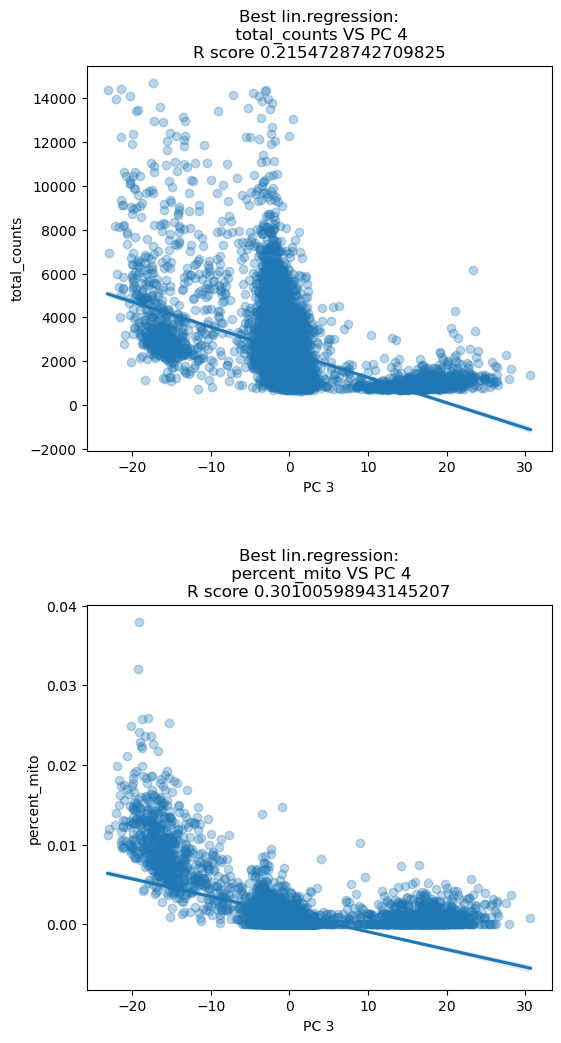

In [79]:
#from pythonScripts import dependentFeatures

#PCA on unnormalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

The biggest variation in the data at this point is explained by total UMI count. Normalizing with TPM should remove this bias.

In [28]:
adata.obsm['X_pca']

array([[-20.658987  ,  -5.336125  ,  -5.8681808 , ...,   1.7649032 ,
          0.696177  ,  -0.63024753],
       [ -8.407599  , -15.004973  ,  -7.1622143 , ...,  -0.2704245 ,
          2.3303006 ,   1.4961222 ],
       [-13.400133  ,   0.9581433 ,  -8.05981   , ...,   0.85647863,
         -1.0111316 ,   0.63733834],
       ...,
       [-33.131634  ,   6.1482687 ,  -5.2190027 , ...,  -0.9560825 ,
         -0.05600707,  -0.2834487 ],
       [-34.567257  ,  10.120633  ,  -3.6774921 , ...,   0.37776762,
         -0.1369428 ,  -0.7167215 ],
       [ 54.505547  ,   2.274753  ,  41.95982   , ...,   0.82863986,
         -2.6813722 ,  -2.6668801 ]], dtype=float32)

In [29]:
adata.varm['PCs']

array([[ 9.32368111e-04,  7.56215405e-05, -4.80834441e-04, ...,
         2.59498278e-03,  6.08101609e-03, -3.84299741e-04],
       [ 2.12253332e-04, -2.49402545e-04, -1.81822241e-05, ...,
         1.05437563e-03, -3.30760443e-04,  3.92738167e-04],
       [ 8.11531474e-05, -9.30969279e-05, -1.18261677e-05, ...,
         7.22455435e-04,  1.18510550e-03, -1.93810057e-04],
       ...,
       [ 1.87104634e-03,  1.84989207e-03, -2.46969054e-03, ...,
         9.11659077e-03,  3.57935746e-04, -3.44735165e-03],
       [ 2.94722406e-04,  2.30298577e-04, -1.81552513e-04, ...,
         1.14790990e-03, -3.76217705e-04,  6.88859518e-04],
       [ 8.22687225e-03,  1.03907474e-02, -1.32944964e-02, ...,
         1.77513233e-02, -1.14964172e-02, -1.09490258e-02]])

In [30]:
adata.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': False},
 'variance': array([1522.95578916,  690.15368095,  389.81274587,  188.02021764,
         139.26864955,   83.16703898,   41.59814802,   34.80922363,
          26.25637425,   23.47136798,   19.66208263,   18.47711604,
          17.11330471,   12.83680472,   12.19095221,   10.10895722,
           9.63908828,    7.49432461,    7.41665393,    7.26090119,
           6.72060395,    6.43497842,    6.14157897,    5.67623395,
           5.21870018,    4.97527338,    4.6299048 ,    4.5373438 ,
           4.1295988 ,    4.02619037,    3.83915821,    3.77442385,
           3.628707  ,    3.56835768,    3.49080407,    3.43287629,
           3.4077601 ,    3.38130604,    3.31594255,    3.24555629,
           3.21524224,    3.14793558,    3.06262243,    3.04654563,
           3.0227724 ,    2.95024905,    2.92675768,    2.87704404,
           2.86501517,    2.84496396]),
 'variance_ratio': array([0.26570169, 0.12040731, 0.06800848, 0.0328

In [31]:
adata.var['feature_types']

LOC100996442    Gene Expression
LOC112268260    Gene Expression
LOC105378947    Gene Expression
LOC100288069    Gene Expression
LINC01409       Gene Expression
                     ...       
ND3             Gene Expression
ND4             Gene Expression
ND5             Gene Expression
ND6             Gene Expression
CYTB            Gene Expression
Name: feature_types, Length: 24717, dtype: category
Categories (1, object): ['Gene Expression']

In [32]:
adata.var['n_cells']

LOC100996442    491
LOC112268260    239
LOC105378947     65
LOC100288069    280
LINC01409       167
               ... 
ND3              87
ND4             626
ND5             251
ND6              61
CYTB            498
Name: n_cells, Length: 24717, dtype: int64

In [33]:
adata.var['chromosome']

LOC100996442     1
LOC112268260     1
LOC105378947     1
LOC100288069     1
LINC01409        1
                ..
ND3             MT
ND4             MT
ND5             MT
ND6             MT
CYTB            MT
Name: chromosome, Length: 24717, dtype: category
Categories (26, object): ['1', '2', '3', '4', ..., 'MT', 'Un', 'X', 'Y']

In [34]:
test=adata[adata.obs['DATASET']=='SN116']

In [35]:
test

View of AnnData object with n_obs × n_vars = 2803 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced'

In [36]:
lnc = adata.var_names # with LNC in name

In [37]:
ss = [adata.var_names]

In [38]:
LINC = ['LINC' in i for i in adata.var_names] 

In [39]:
adata[:,LINC]

View of AnnData object with n_obs × n_vars = 7770 × 1261
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced'

In [40]:
adata[:,LINC].var_names

Index(['LINC01409', 'LINC01128', 'LINC01342', 'LINC01786', 'LINC01134',
       'LINC02780', 'LINC01672', 'LINC01714', 'LINC02606', 'LINC02766',
       ...
       'LINC00630', 'LINC02589', 'LINC01285', 'LINC00629', 'LINC00892',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1261)

In [41]:
adata.var['feature_types'] # all feature_types are "Gene expression"

LOC100996442    Gene Expression
LOC112268260    Gene Expression
LOC105378947    Gene Expression
LOC100288069    Gene Expression
LINC01409       Gene Expression
                     ...       
ND3             Gene Expression
ND4             Gene Expression
ND5             Gene Expression
ND6             Gene Expression
CYTB            Gene Expression
Name: feature_types, Length: 24717, dtype: category
Categories (1, object): ['Gene Expression']

In [42]:
adata.obs.head()

DATASET batch  total_counts  n_genes_by_counts  \
SN116_AAACCTGCACCGGAAA   SN116     0   1582.000000               1450   
SN116_AAACCTGCAGACGCCT   SN116     0   2672.000000               2160   
SN116_AAACCTGGTCCCGACA   SN116     0   2255.000000               1901   
SN116_AAACCTGGTCTCAACA   SN116     0   2002.500000               1712   
SN116_AAACCTGTCGGCGCAT   SN116     0   1472.666626               1348   

                        percent_mito  prop_unspl  prop_spl  perc_MALAT1  \
SN116_AAACCTGCACCGGAAA      0.000000    0.760000  0.240000     0.001264   
SN116_AAACCTGCAGACGCCT      0.000000    0.508545  0.491455     0.001497   
SN116_AAACCTGGTCCCGACA      0.001774    0.521601  0.478399     0.003548   
SN116_AAACCTGGTCTCAACA      0.000000    0.771748  0.228252     0.002996   
SN116_AAACCTGTCGGCGCAT      0.000000    0.780639  0.219361     0.002716   

                        n_genes  doublet_scores  predicted_doublets  
SN116_AAACCTGCACCGGAAA     1450        0.015877               False  
SN116_AAACCTGCAGACGCCT     2160        0.034145               False  
SN116_AAACCTGGTCCCGACA     1901        0.040484               False  
SN116_AAACCTGGTCTCAACA     1712        0.013447               False  
SN116_AAACCTGTCGGCGCAT     1348        0.018012               False

In [43]:
adata.obs.tail()

DATASET batch  total_counts  n_genes_by_counts  \
SN143_TTTGTCACATGCCTTC   SN143     1   5288.166504               3789   
SN143_TTTGTCAGTGCAACGA   SN143     1   3776.500000               2920   
SN143_TTTGTCAGTGCAGTAG   SN143     1    877.000000                889   
SN143_TTTGTCATCTCTGTCG   SN143     1    893.500000                921   
SN143_TTTGTCATCTTCGAGA   SN143     1   4324.132812               3267   

                        percent_mito  prop_unspl  prop_spl  perc_MALAT1  \
SN143_TTTGTCACATGCCTTC      0.001135    0.739652  0.260348     0.016452   
SN143_TTTGTCAGTGCAACGA      0.000000    0.762986  0.237014     0.021713   
SN143_TTTGTCAGTGCAGTAG      0.000000    0.705009  0.294991     0.002281   
SN143_TTTGTCATCTCTGTCG      0.000000    0.633452  0.366548     0.003358   
SN143_TTTGTCATCTTCGAGA      0.002081    0.737524  0.262476     0.017113   

                        n_genes  doublet_scores  predicted_doublets  
SN143_TTTGTCACATGCCTTC     3789        0.026452               False  
SN143_TTTGTCAGTGCAACGA     2920        0.013913               False  
SN143_TTTGTCAGTGCAGTAG      889        0.013447               False  
SN143_TTTGTCATCTCTGTCG      921        0.009633               False  
SN143_TTTGTCATCTTCGAGA     3267        0.045421               False

In [44]:
test = adata.var['chromosome']=='MT'

In [45]:
#test_adata = [x for x in adata.var_names if adata.var['chromosome']=='MT']

In [46]:
#test_adata

NameError: name 'test_adata' is not defined

In [ ]:
adata.layers

In [47]:
adata.to_df(layer="raw_counts")

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  SAMD11  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0     0.0   
...                              ...        ...        ...        ...     ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0     1.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0     0.0   

                        NOC2L  HES4  ...  ND1  COX1  COX2  ATP6  COX3  ND3  \
SN116_AAACCTGCACCGGAAA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGCAGACGCCT    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGGTCCCGACA    0.0   0.0  ...  0.0   0.0   0.0   1.0   3.0  0.0   
SN116_AAACCTGGTCTCAACA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGTCGGCGCAT    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
...                       ...   ...  ...  ...   ...   ...   ...   ...  ...   
SN143_TTTGTCACATGCCTTC    0.0   0.0  ...  2.0   0.0   0.0   1.0   3.0  0.0   
SN143_TTTGTCAGTGCAACGA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCAGTGCAGTAG    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCATCTCTGTCG    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCATCTTCGAGA    0.0   0.0  ...  4.0   0.0   1.0   1.0   3.0  0.0   

                        ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.0  0.0  0.0   0.0  
...                     ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [48]:
# TPM normalization. 
sc.pp.normalize_per_cell(adata)

In [49]:
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0   

                         SAMD11  NOC2L  HES4  ...       ND1  COX1      COX2  \
SN116_AAACCTGCACCGGAAA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGCAGACGCCT  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGGTCCCGACA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGGTCTCAACA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGTCGGCGCAT  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
...                         ...    ...   ...  ...       ...   ...       ...   
SN143_TTTGTCACATGCCTTC  0.00000    0.0   0.0  ...  0.684408   0.0  0.000000   
SN143_TTTGTCAGTGCAACGA  0.48103    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCAGTGCAGTAG  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCATCTCTGTCG  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCATCTTCGAGA  0.00000    0.0   0.0  ...  1.673828   0.0  0.418457   

                            ATP6      COX3  ND3  ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.803455  2.410364  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
...                          ...       ...  ...  ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.342204  1.026612  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.418457  1.255371  0.0  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [50]:
# matrix logarithmization (ln(x+1))
sc.pp.log1p(adata)

In [ ]:
# to see counts
adata.to_df()

In [51]:
# most variable genes, True or False
sc.pp.highly_variable_genes(adata, n_top_genes=15000)

In [52]:
# scale, standardized with mean 0 and variance 1
sc.pp.scale(adata)
adata.layers['scaled_counts'] = adata.X.copy()

In [ ]:
adata.to_df()

In [ ]:
adata.var

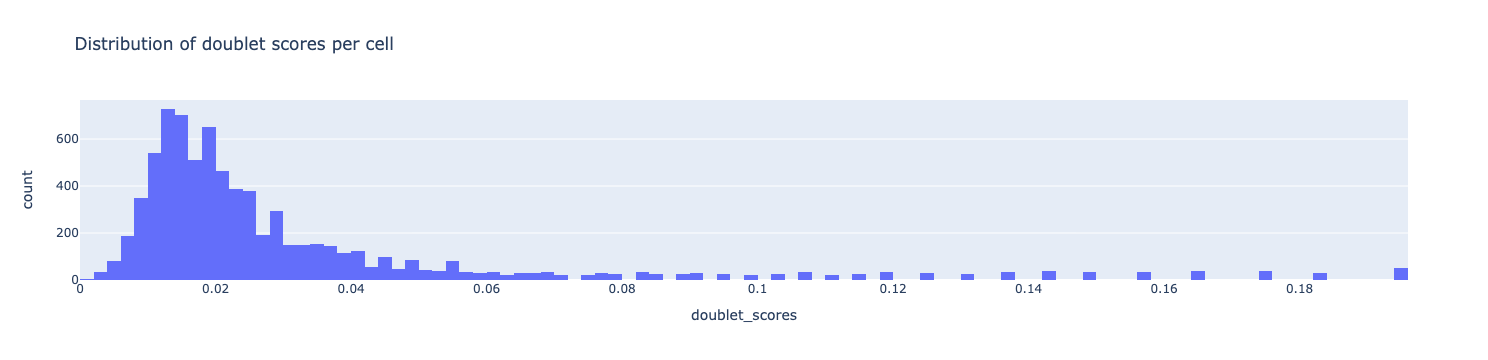

In [53]:
fig = px.histogram(adata.obs, x='doublet_scores', title='Distribution of doublet scores per cell')
fig.show()

In [54]:
adata.layers

Layers with keys: raw_counts, spliced, unspliced, scaled_counts

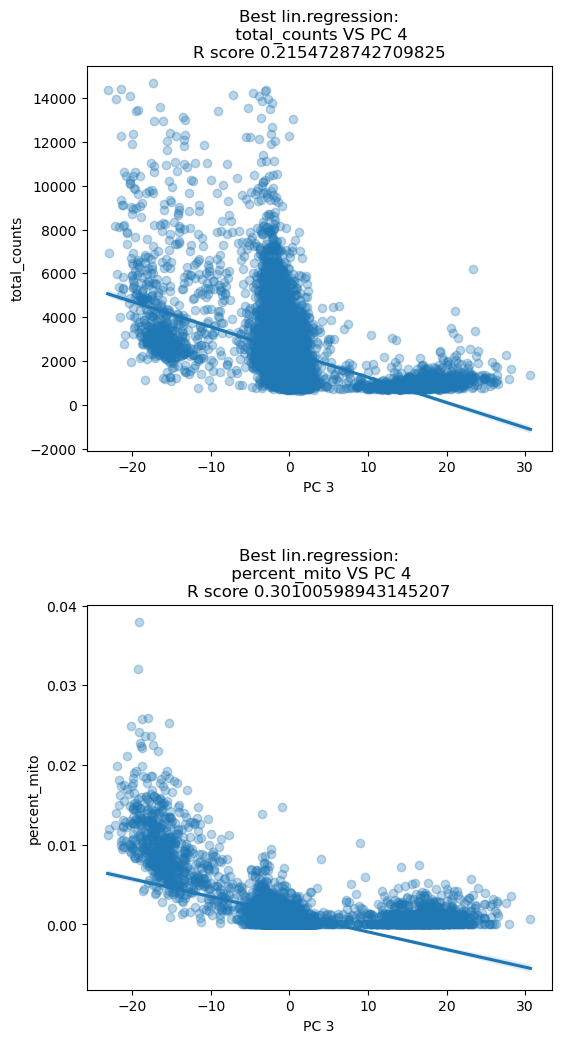

In [55]:
#PCA on normalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

Now the correlation isn't strong.

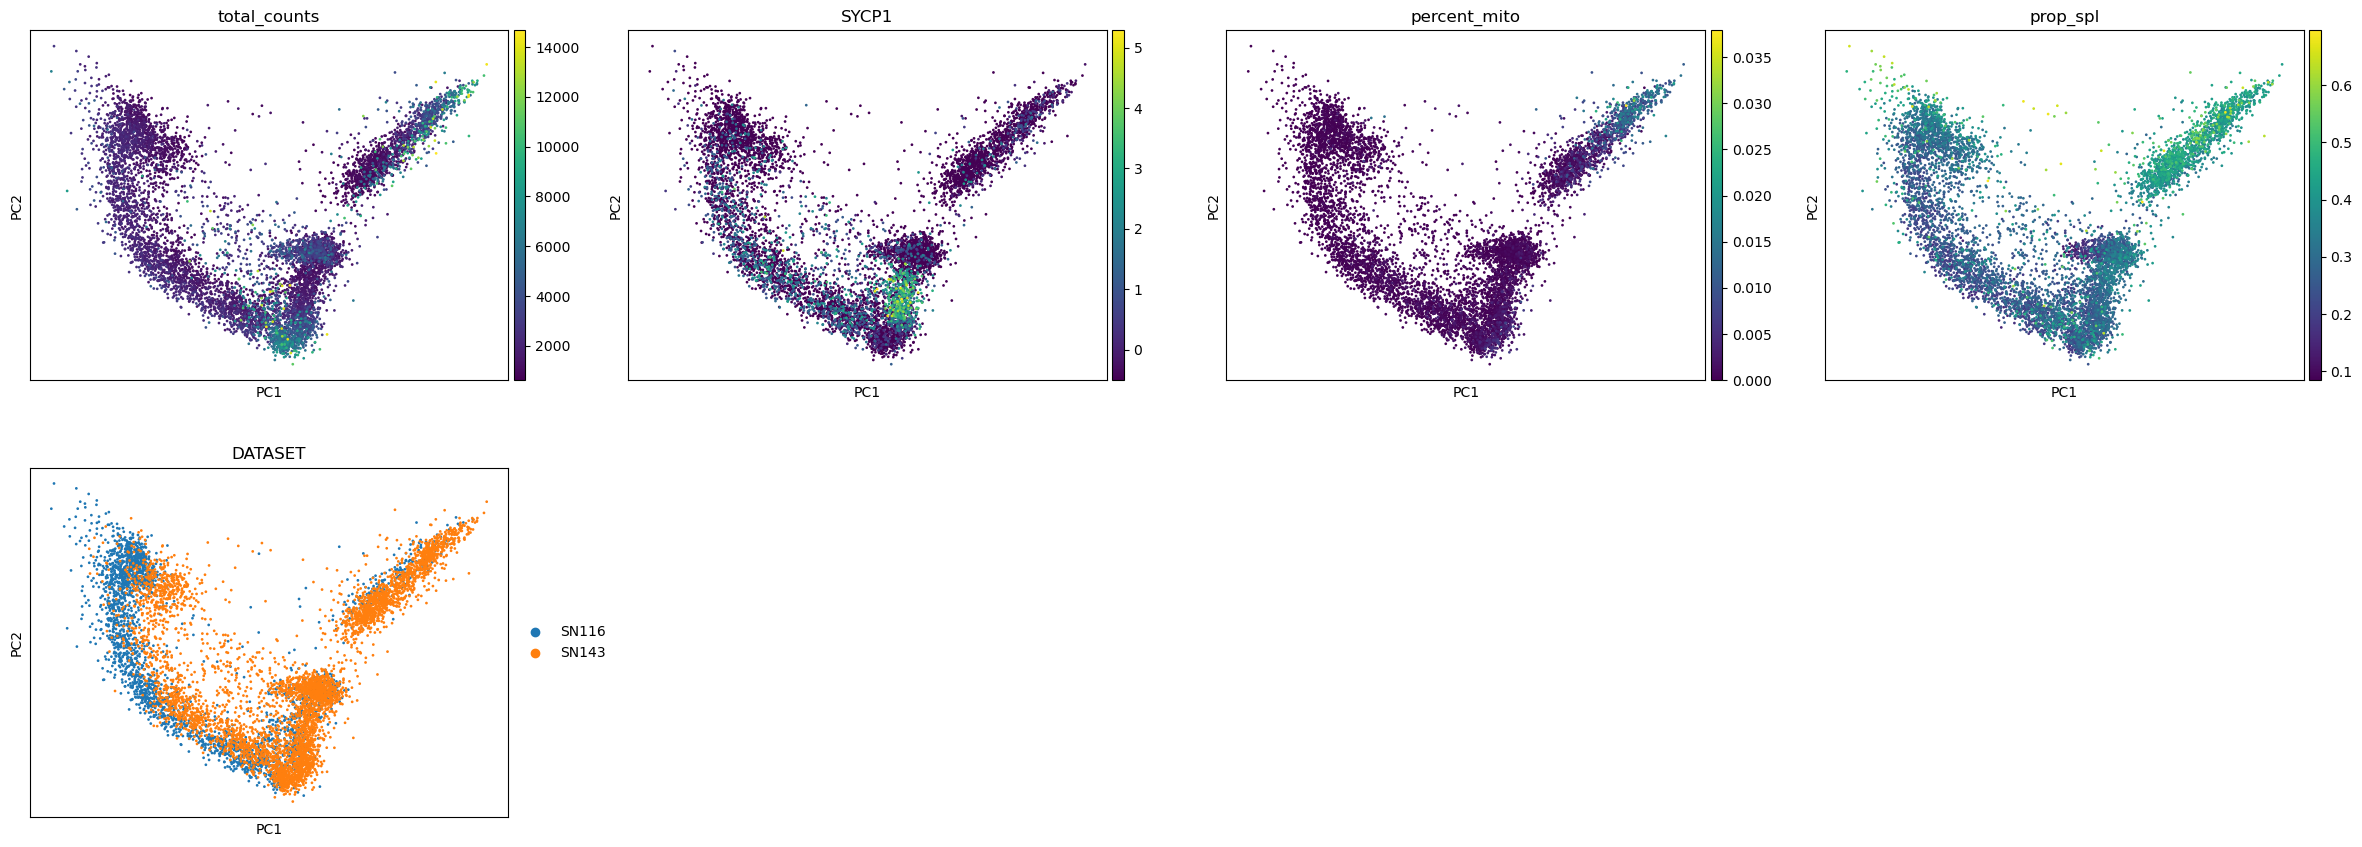

In [56]:
sc.pl.pca(adata, color=['total_counts', 'SYCP1', 'percent_mito', 'prop_spl', 'DATASET'])

Luckily the samples overlap, so they can be analyzed combined

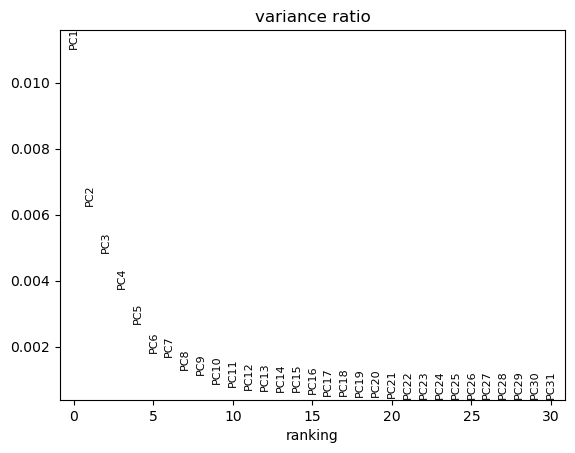

In [57]:
sc.plotting.pca_variance_ratio(adata) # small variance means it probably models noice in the data

Keep the PCs with the most variance, e.g. up to PC15

In [58]:
#sc.pp.neighbors(adata, n_pcs=15, random_state=12345) # use only for data with one single sample
bbknn.bbknn(adata, n_pcs=15)

In [59]:
sc.tools.umap(adata, random_state=54321)

In [60]:
#sc.tools.umap(adata, random_state=54321, n_components=3) # 3 components for 3D projection

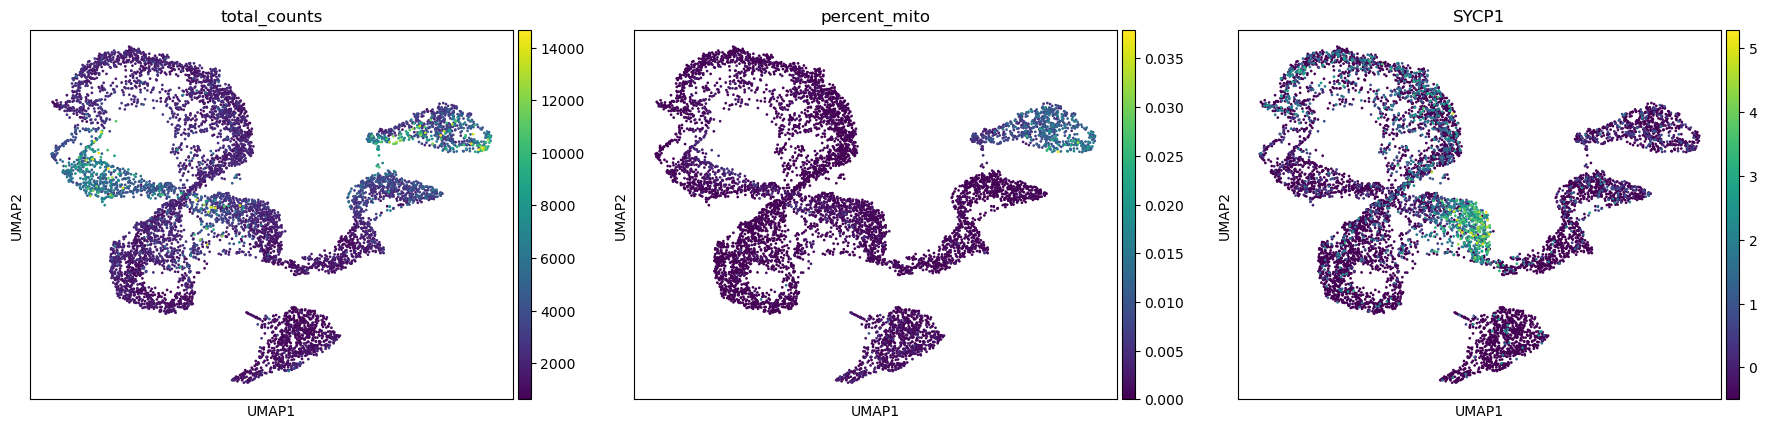

In [61]:
sc.plotting.umap(adata, color=['total_counts','percent_mito', 'SYCP1'])

In [62]:
#sc.plotting.umap(adata, color=['TNP2'], components=['1,2','1,3','2,3']) 

In [63]:
X = adata.obsm['X_umap']
fig = px.scatter_3d(adata.obsm, x=X[:,0], y=X[:,1], z=X[:,2], color=adata.obs['total_counts'], opacity=.5)
fig.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [64]:
#sc.plotting.umap(adata, color=['TNP2'], projection='3d', components=['1,2,3'] 

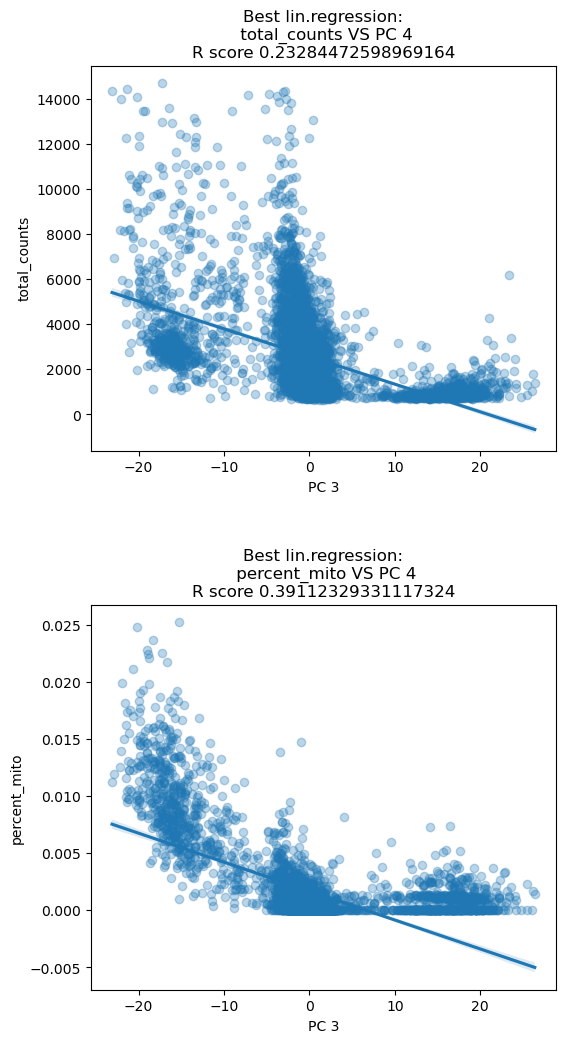

In [65]:
dependentFeatures(adata=adata[adata.obs['DATASET']=='SN143'], obs_subset=['total_counts','percent_mito'])

In [66]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'DATASET_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivities'

In [67]:
print( list( adata.obs.columns ) )

['DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts']


In [68]:
print( list( adata.var.columns ) )

['gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std']


In [69]:
#print( list( adata.obs['DATASET'] ) )


In [73]:
markers = dict() #make an empty dictionary
### SPERMATOCYTOGENESIS
markers['SpermatogoniaA'] = ['ID4','HMGA1']
markers['SpermatogoniaB'] = ['MKI67','DMRT1','STRA8'] 
markers['SpermatocytesI'] = ['MEIOB','PRSS50','SYCP1','TEX101']
markers['SpermatocytesII'] = ['PIWIL1','ACRV1','SPATA16','CLGN']
### SPERMIOGENESIS
markers['Round.Spt'] = ['SPATA9','SPAM1'] #Round spermatids
markers['Elong.Spt'] = ['PRM1','PRM2'] #Elongated spermatids
### SOMATIC CELLS
markers['Sertoli'] = ['CTSL', 'VIM']
markers['Macroph'] = ['CD163','TYROBP']
markers['Leydig'] = ['CFD']
markers['Endothelial'] = ['CD34']
markers['Myoid'] = ['ACTA2']
markers['Pericyte'] = ['MYL9']

In [80]:
markers_scores, adata = marker_score(markers, adata)

In [81]:
#leiden clustering at various resolutions
sc.tools.leiden(adata, resolution=1, random_state=12345, key_added='leiden_R1')
sc.tools.leiden(adata, resolution=0.5, random_state=12345, key_added='leiden_R.5')
sc.tools.leiden(adata, resolution=0.25, random_state=12345, key_added='leiden_R.25')
sc.tools.leiden(adata, resolution=0.1, random_state=12345, key_added='leiden_R.1')

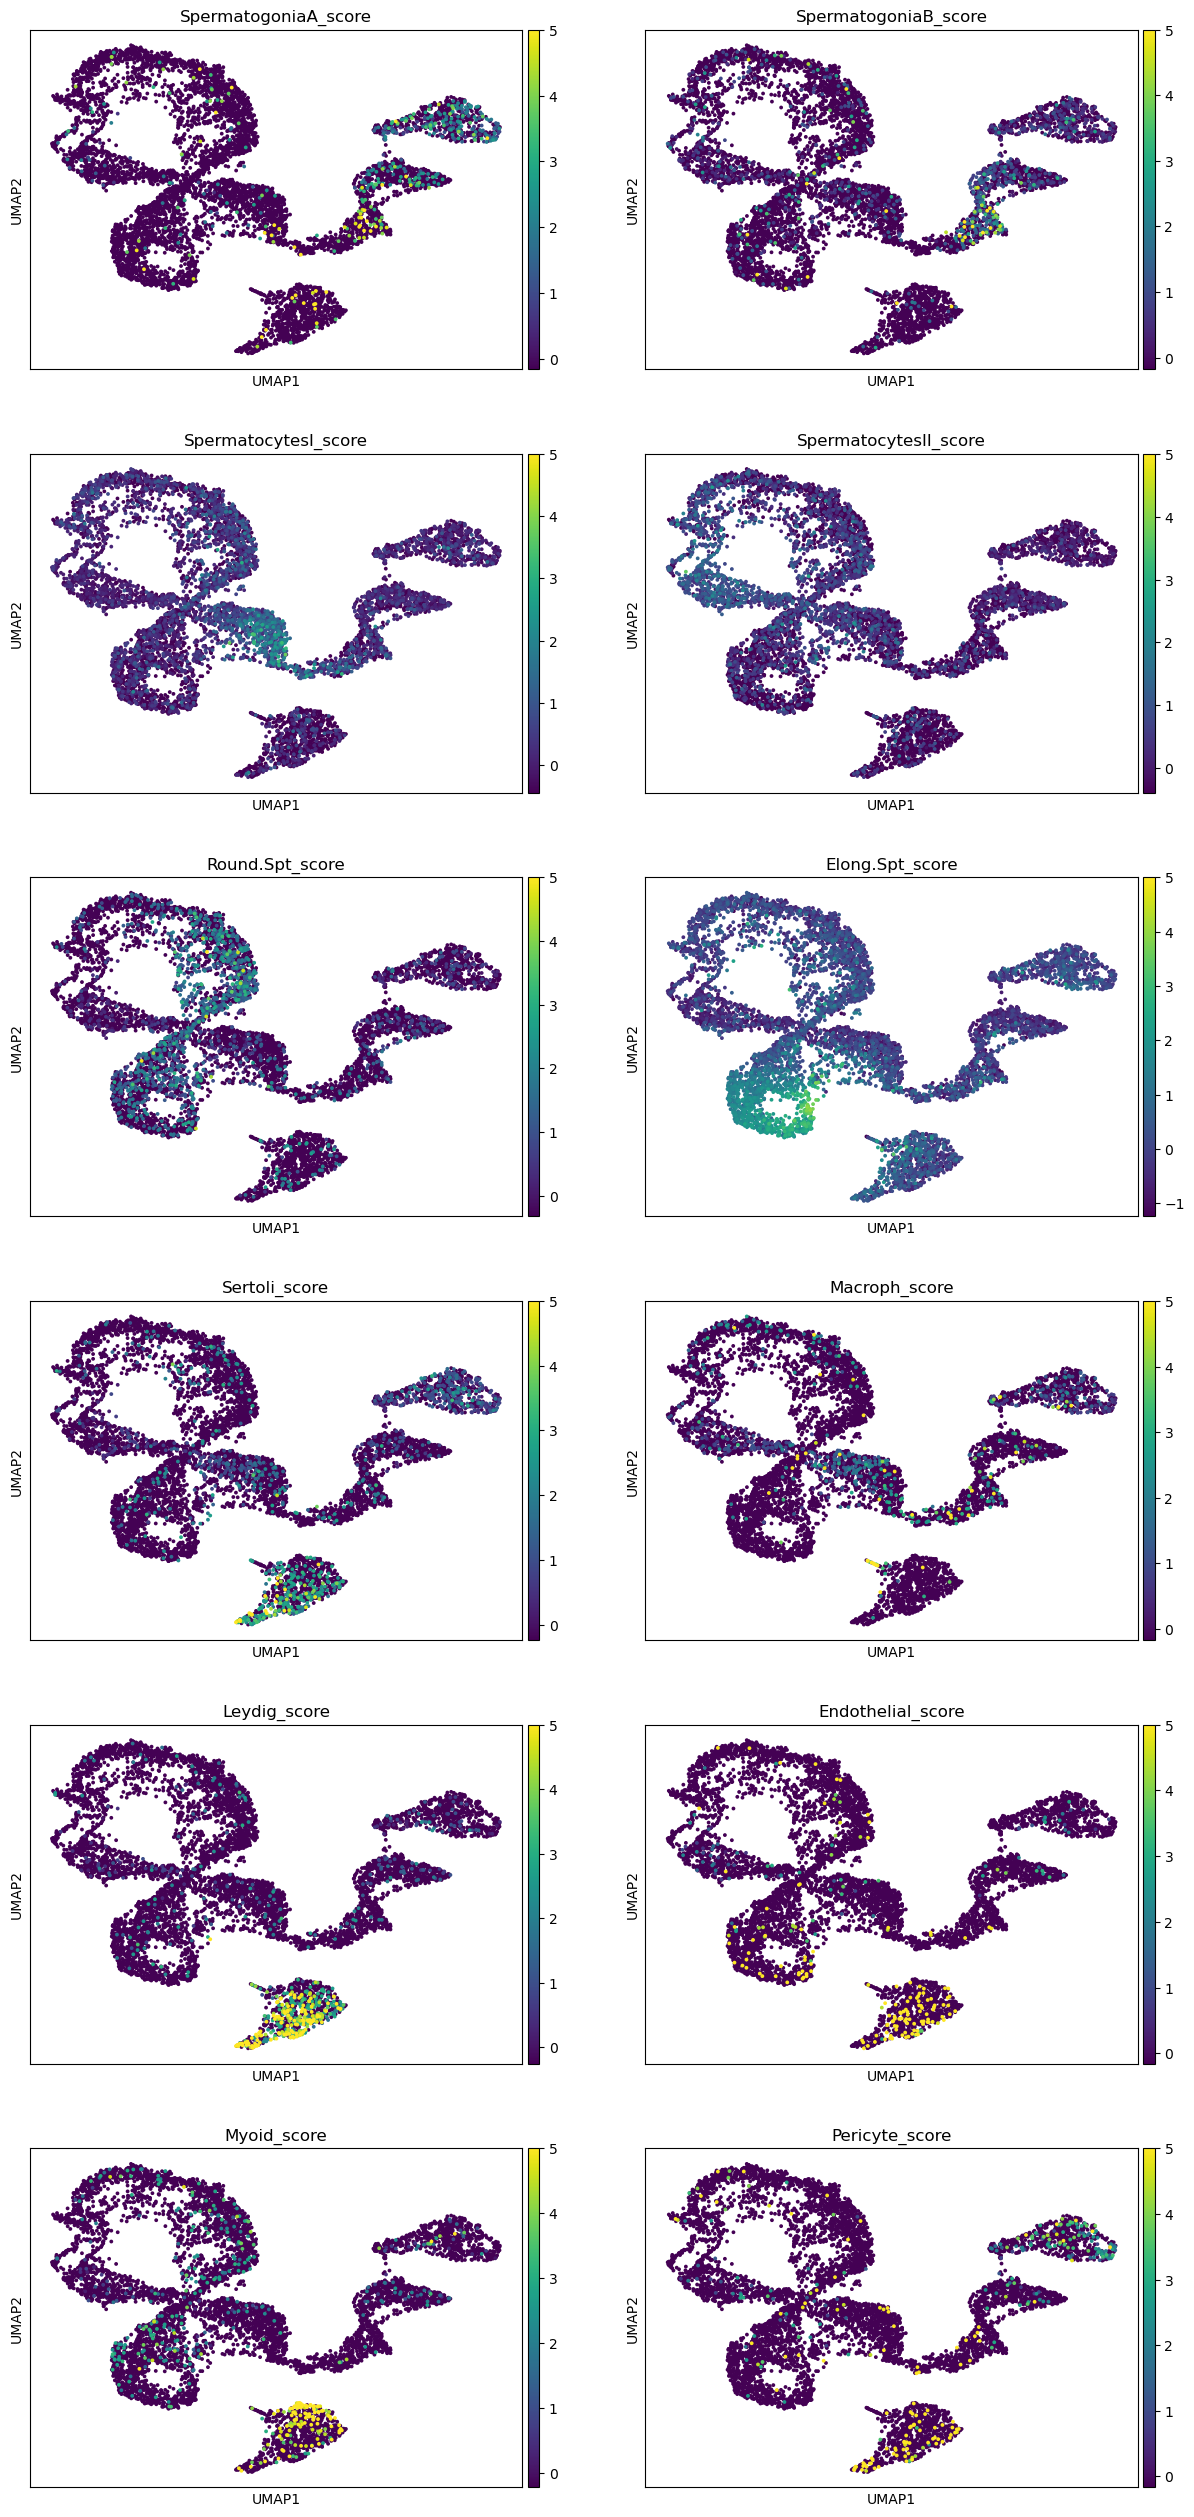

In [82]:
sc.plotting.umap(adata, color=markers_scores, components=['1,2'], ncols=2, vmax=5, s=30)

In [83]:
#Perform the test on logarithmized data (and not scaled) therefore starting with 'raw_counts' again
adata.X = adata.layers['raw_counts'] #raw data
sc.pp.normalize_per_cell(adata) #TPM normalization
sc.pp.log1p(adata) #logarithm
sc.tl.rank_genes_groups(adata, groupby='leiden_R.25', n_genes=50) #Top 50 diff.expressed genes in each cluster
adata.X = adata.layers['scaled_counts'] #Set again the scaled data as standard data matrix

In [84]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
X = pd.DataFrame(
    {group + '_' + key[:1].upper(): result[key][group]
    for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})
X.head() #print only first five lines

0_N            0_P       0_L     1_N            1_P       1_L  \
0         TTC28  7.003271e-205  1.945144    PRM1   0.000000e+00  3.034767   
1      ANKRD30A  6.345679e-184  2.172620    NFIC   0.000000e+00  3.645839   
2         TEX41  3.589646e-168  3.073722    PRM2   0.000000e+00  2.794098   
3          RRP8  1.735088e-150  3.089752  DRICH1  6.750542e-269  2.831252   
4  LOC105373554  2.975881e-144  3.979664   HMGB4  4.113551e-230  2.803277   

      2_N            2_P       2_L     3_N  ...       6_L       7_N  \
0    GPC6  5.516343e-198  2.337307  MALAT1  ...  4.893624    RBFOX1   
1   TEX51  5.201500e-184  3.978329     DCN  ...  5.259974     TENM3   
2  SMIM23  4.216024e-158  2.867294   TSHZ2  ...  3.234508     FOXP1   
3   CNBD1  3.279038e-141  2.297984  IGFBP7  ...  4.828810      KAZN   
4  CLDND2  3.582892e-136  3.247948   LAMA2  ...  4.066847  IL1RAPL1   

             7_P       7_L           8_N            8_P       8_L  \
0  9.792859e-103  1.319247      ANKRD30A   0.000000e+00  3.322398   
1   7.692778e-97  1.273716       ZNF385D  1.009549e-266  3.699369   
2   4.618370e-84  1.967516      ANKRD30B  1.314895e-266  3.386587   
3   1.188780e-68  1.187494      CATSPER2  7.418593e-209  3.042156   
4   5.943600e-68  1.424042  LOC101927284  2.353584e-197  2.640383   

                              9_N            9_P       9_L  
0                           KCNQ1  2.070139e-120  3.449039  
1                        KCNQ1OT1   1.888232e-74  3.120203  
2  amplicon_chrY_TSPY1/10/2/3/4/8   8.860620e-73  4.792059  
3                    LOC101928697   2.113671e-39  4.679963  
4       amplicon_chrX_VCX/2/3A/3B   5.262141e-35  2.746992  

[5 rows x 30 columns]

In [85]:
X[ ['3_N'] ]

3_N
0      MALAT1
1         DCN
2       TSHZ2
3      IGFBP7
4       LAMA2
5        EBF1
6        APOE
7    MIR99AHG
8       RBMS3
9      ZBTB20
10      NEAT1
11      PRKG1
12  NR2F2-AS1
13       IGF1
14      ITM2B
15    RUNX1T1
16     IGFBP6
17   MIR100HG
18      LTBP4
19        GSN
20      GSTM5
21      NR2F2
22        B2M
23     FRMPD4
24       CST3
25     SPTBN1
26      PLPP3
27     LHFPL6
28        CFD
29     TMSB4X
30        MGP
31        C1S
32      LSAMP
33       ACTB
34      PTCH2
35   INS-IGF2
36      BICC1
37     COL1A2
38       IGF2
39     COL6A2
40      TIMP3
41     COL6A1
42      SMOC2
43       RORA
44      DDX17
45  LINC02456
46     ADGRB3
47       BNC2
48      FBLN5
49       NFIA

In [86]:
cd /home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results

/faststorage/project/testis_singlecell/Workspaces/adahl/birc-project-akd/results


In [88]:
!mkdir -p cluster_gene_results/MAC

In [90]:
X.to_csv('cluster_gene_results/MAC/expr_annotation.csv', sep=',', index=None)

In [ ]:
new_names = {
    '0':'SpermatogoniaA.1',
    '1':'SpermatogoniaA.2',
    '2':'Myoid',
    '3':'Endothelial',
    '4':'Leydig',
    '5':'SpermatogoniaB',
    '6':'Elong_Spermatids',
    '7':'SpermatocitesII.1',
    '8':'SpermatocitesII.2',
    '9':'Round_Spermatids',
    '10':'SpermatocitesI',
    '11':'Macroph',
    '12':'Pericytes'
}